In [1]:
from utilities import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

X_train, y_train, X_test, y_test = load_data()

In [2]:
X_train.shape, y_train.shape

((1000, 64, 64), (1000, 1))

In [3]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([500, 500]))

In [4]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([100, 100]))

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


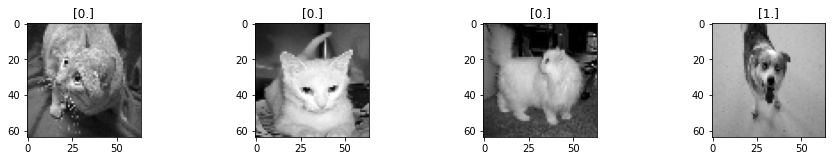

In [5]:
# AFFICHER UNE EXTRAITS DU DATASET
plt.figure(figsize=(16, 8))
for i in range(1, 5):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [6]:
# CHAT: 0, CHIEN: 1

In [29]:
from tqdm import tqdm

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

# MODEL
def model(X, W, b):
    # Calculer le vecteur Z
    Z = X.dot(W) + b # Z = X.W + b
    A = 1 / (1 + np.exp(-Z)) # A = 1/(1+e^-z) (Fonction Sigmoide)
    return A

# FUNCTION COUT
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1-A + epsilon))

# DESCENTE DE GRADIENT
def gradients(A, X, y):
    # derivee de L % a W
    dW = 1 / len(y) * np.dot(X.T, (A-y))
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

# MIS A JOUR
## learning_rate = pas de mis a jour
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

# PREDICTION
def predict(X, W, b):
    # Activation
    A = model(X, W, b)
    #print(A) # LA PROBABILITE D'APPERTENIR A CLASSE 1
    return A >= 0.5

# RASSEMBLEMENT
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    # initialisation W et b
    W, b = initialisation(X_train)
    train_loss = [] # pour verifier l'apprentissage
    train_acc = []
    test_loss = []
    test_acc = []
    # boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # COUT
        A = model(X_train, W, b)
        if i%10 == 0:
            # TRAIN
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            # TEST
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        # GRADIENTS
        dW, db = gradients(A, X_train, y_train)
        # MIS A JOUR
        W, b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="TRAIN LOSS") # L'evolution des erreurs effectuees par le model
    plt.plot(test_loss, label="TEST LOSS")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="TRAIN ACC") # L'evolution de l'entrainement
    plt.plot(test_acc, label="TEST ACC")
    plt.legend()
    plt.show()
    
    return (W, b) # Parametre que le model a apris

### APPLATIR LE DATASET

<ipython-input-7-37c491d9d2e9>:10: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z)) # A = 1/(1+e^-z) (Fonction Sigmoide)


0.51


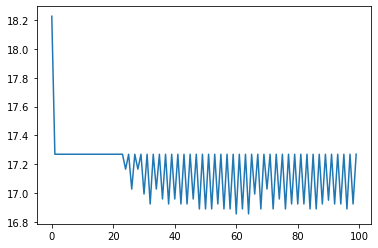

In [8]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) # -1: Reorganiser le reste
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
X_train_reshape.shape, X_test_reshape.shape

W, b = artificial_neuron(X_train_reshape, y_train)

### NORMALISER LES DONNEES

100%|██████████| 1000/1000 [00:53<00:00, 18.72it/s]


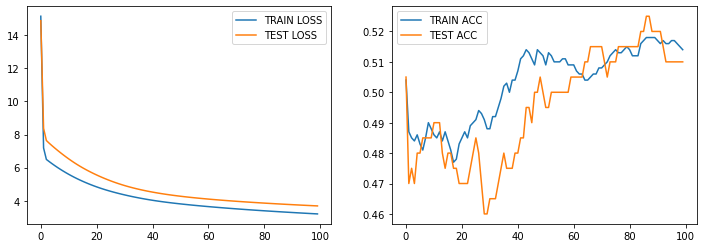

In [30]:
# Mettre sur le meme echelle toute les variables dans DATASET
X_train_reshape = X_train_reshape / X_train_reshape.max()
X_test_reshape = X_test_reshape / X_test_reshape.max()

W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=1000)

### LE MODEL TOMBE SUR OVERFITING